In [1]:
#importing pandas liabries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

In C:\Users\Benjamin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Benjamin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Benjamin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Benjamin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Benjamin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_c

In [10]:
#Setting up of data
data_train=pd.read_csv('C:/Users/Benjamin/Desktop/SimpliLearn_ML&AI/ML_AI/Demo_Datasets (1)/Demo Datasets/Lesson 4/bigmart_train.csv')


In [11]:
data_test=pd.read_csv('C:/Users/Benjamin/Desktop/SimpliLearn_ML&AI/ML_AI/Demo_Datasets (1)/Demo Datasets/Lesson 4/bigmart_test.csv')


In [12]:
data_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [13]:
#Summary statistics of numberical data
data_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [14]:
#Summary statistics for categorical data 
data_train.describe(include=object).T

,count,unique,top,freq
Item_Identifier,8523,1559,FDW13,10
Item_Fat_Content,8523,5,Low Fat,5089
Item_Type,8523,16,Fruits and Vegetables,1232
Outlet_Identifier,8523,10,OUT027,935
Outlet_Size,6113,3,Medium,2793
Outlet_Location_Type,8523,3,Tier 3,3350
Outlet_Type,8523,4,Supermarket Type1,5577


In [15]:
#printing the shape and of the train and test data
print(data_train.shape)
print(data_test.shape)

(8523, 12)
(5681, 11)


In [16]:
#Cols that not required for any  analysis
data_train=data_train.drop(['Outlet_Identifier','Item_Identifier'],axis=1)

In [17]:
#Check and drop deplicate columns 
print('Before dedup:', data_train.shape)
data_cln=data_train.loc[:, ~data_train.columns.duplicated()]
print('After dedup:', data_cln.shape)
duplicateCols=data_train.loc[:, data_train.columns.duplicated()]
if (duplicateCols.shape[1] !=0):
    print('Number of duplicated columns dropped:', duplicatedCols.shape[1])
    print("Dupliate columns except first occurrences:")
    print(list(duplicateCols.columns))

Before dedup: (8523, 10)
After dedup: (8523, 10)


In [18]:
#Check and drop duplicated rows based on all columns
print ('Before dedup:', data_cln.shape)
data_cln.drop_duplicates(inplace=True) #by default keep='first'
print('After dedup:', data_cln.shape)
duplicateRows=data_train[data_train.duplicated()]
print('Number of duplicated rows dropped:', data_train.shape[0] - data_cln.shape[0])
if (data_cln.shape[0] - data_train.shape[0] !=0):
    print("Duplicate rows except first occurrence:")
    print(duplicateRows)

Before dedup: (8523, 10)
After dedup: (8523, 10)
Number of duplicated rows dropped: 0


In [19]:
#Finding Missing values
def zero_missing_unique(df):
    var_miss_rate=df.isnull().sum(axis=0)/df.shape[0]
    var_miss_rate=var_miss_rate.to_frame('missing_rate')
    
    var_zero_rate=(df==0).astype(int).sum(axis=0)/df.shape[0]
    var_zero_rate=var_zero_rate.to_frame('zero_rate')
    var_unique=df.nunique().to_frame('count_unique')
    var_type=df.dtypes.to_frame('data_type')
    data_stat=pd.concat([var_miss_rate, var_zero_rate,var_unique, var_type], axis=1)
    return data_stat
stat_zero_missing_unique=zero_missing_unique(data_train)# just change the data name here to your own data
stat_zero_missing_unique

,missing_rate,zero_rate,count_unique,data_type
Item_Weight,0.171653,0.000000,415,float64
Item_Fat_Content,0.000000,0.000000,5,object
Item_Visibility,0.000000,0.061715,7880,float64
Item_Type,0.000000,0.000000,16,object
Item_MRP,0.000000,0.000000,5938,float64
Outlet_Establishment_Year,0.000000,0.000000,9,int64
Outlet_Size,0.282764,0.000000,3,object
Outlet_Location_Type,0.000000,0.000000,3,object
Outlet_Type,0.000000,0.000000,4,object
Item_Outlet_Sales,0.000000,0.000000,3493,float64


In [20]:
#Dealing with the missing rate 
#do not drop high mising rate variable 
#use imputing approach specified in preprocessing
stat_zero_missing_unique.sort_values(by='missing_rate', ascending=False)

,missing_rate,zero_rate,count_unique,data_type
Outlet_Size,0.282764,0.000000,3,object
Item_Weight,0.171653,0.000000,415,float64
Item_Fat_Content,0.000000,0.000000,5,object
Item_Visibility,0.000000,0.061715,7880,float64
Item_Type,0.000000,0.000000,16,object
Item_MRP,0.000000,0.000000,5938,float64
Outlet_Establishment_Year,0.000000,0.000000,9,int64
Outlet_Location_Type,0.000000,0.000000,3,object
Outlet_Type,0.000000,0.000000,4,object
Item_Outlet_Sales,0.000000,0.000000,3493,float64


In [21]:
#Grouping by Item Type
item_type_baseline = data_train.groupby('Item_Type').mean()[['Item_Weight']].reset_index()
item_type_baseline = item_type_baseline.to_numpy()
item_type_baseline

array([['Baking Goods', 12.277108208955223],
       ['Breads', 11.346936274509805],
       ['Breakfast', 12.768202247191013],
       ['Canned', 12.305705009276437],
       ['Dairy', 13.42606890459364],
       ['Frozen Foods', 12.867061281337046],
       ['Fruits and Vegetables', 13.224769381746812],
       ['Hard Drinks', 11.400327868852461],
       ['Health and Hygiene', 13.14231395348837],
       ['Household', 13.384736495388669],
       ['Meat', 12.81734421364985],
       ['Others', 13.853284671532847],
       ['Seafood', 12.552843137254904],
       ['Snack Foods', 12.987879554655871],
       ['Soft Drinks', 11.847459893048129],
       ['Starchy Foods', 13.69073076923077]], dtype=object)

In [22]:
## Item weight standardization using item type
for x in item_type_baseline:
    print(x[0])

Baking Goods
Breads
Breakfast
Canned
Dairy
Frozen Foods
Fruits and Vegetables
Hard Drinks
Health and Hygiene
Household
Meat
Others
Seafood
Snack Foods
Soft Drinks
Starchy Foods


In [23]:
def item_Weight_cal(cols):
    Item_Wt = cols[0]
    Item_Tp = cols[1]
    if pd.isnull(Item_Wt):
       for x in item_type_baseline:
           if (x[0] == Item_Tp):
               # print (x[1])
               return x[1]
    else:
        return Item_Wt

In [25]:
data_train['Item_Weight'] =data_train[['Item_Weight','Item_Type']].apply(item_Weight_cal, axis = 1)
data_train.isna().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [26]:
data_train[['Outlet_Type','Outlet_Size']].groupby(['Outlet_Type','Outlet_Size']).size()

Outlet_Type        Outlet_Size
Grocery Store      Small           528
Supermarket Type1  High            932
                   Medium          930
                   Small          1860
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
dtype: int64

In [27]:
df = data_train[['Outlet_Type','Outlet_Size']]
df.drop_duplicates()

,Outlet_Type,Outlet_Size
0,Supermarket Type1,Medium
1,Supermarket Type2,Medium
3,Grocery Store,NaN
4,Supermarket Type1,High
7,Supermarket Type3,Medium
8,Supermarket Type1,NaN
11,Supermarket Type1,Small
23,Grocery Store,Small


In [28]:
#Replacing the Missing values with small in the data
data_train['Outlet_Size']=data_train['Outlet_Size'].fillna('Small')

In [29]:
data_train.isna().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [30]:
data_train.groupby(['Item_Fat_Content']).size()

Item_Fat_Content
LF          316
Low Fat    5089
Regular    2889
low fat     112
reg         117
dtype: int64

In [31]:
#Observed irregular data pattern where low fat is represented as LF and low fat and all regular presented as reg
data_train["Item_Fat_Content"].replace({"LF": "Low Fat", "low fat": "Low␣Fat", "reg": "Regular"}, inplace=True)#Observed irregular data pattern where low fat is represented as LF and low fat and all regular presented as reg


In [32]:
data_train.groupby(['Item_Fat_Content']).size()

Item_Fat_Content
Low Fat    5405
Low␣Fat     112
Regular    3006
dtype: int64

<AxesSubplot:>

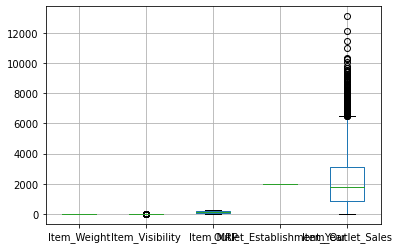

In [34]:
#Checking for Outlier using box plot for the entire data
data_train.boxplot()

<AxesSubplot:xlabel='Item_Visibility'>

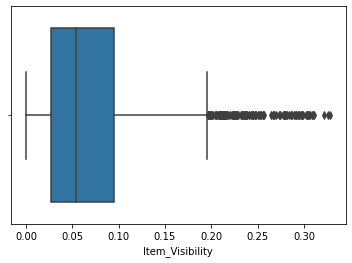

In [35]:
sns.boxplot(data_train['Item_Visibility'])

In [36]:
#Putting a cap on the data
data_train[data_train['Item_Visibility']<0.175].count()

Item_Weight                  8245
Item_Fat_Content             8245
Item_Visibility              8245
Item_Type                    8245
Item_MRP                     8245
Outlet_Establishment_Year    8245
Outlet_Size                  8245
Outlet_Location_Type         8245
Outlet_Type                  8245
Item_Outlet_Sales            8245
dtype: int64

In [37]:
#Viewing the Cap
data_train= data_train[data_train['Item_Visibility'].values < 0.175]

<AxesSubplot:xlabel='Item_Visibility'>

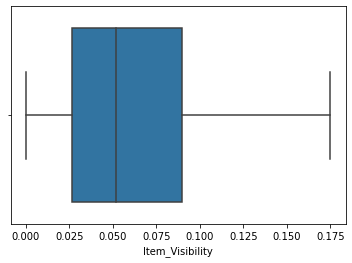

In [38]:
#Viewing the boxplot after the data treatment
sns.boxplot(data_train['Item_Visibility'])

<AxesSubplot:xlabel='Item_Weight'>

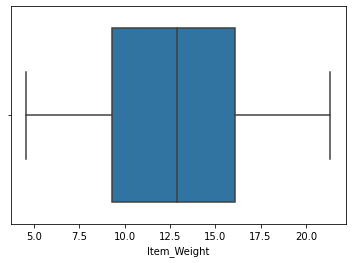

In [39]:
#Viewing the box plot for Weight
sns.boxplot(data_train['Item_Weight'])

<AxesSubplot:xlabel='Item_MRP'>

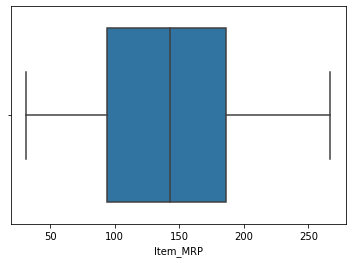

In [40]:
sns.boxplot(data_train['Item_MRP'])

<AxesSubplot:xlabel='Item_Outlet_Sales'>

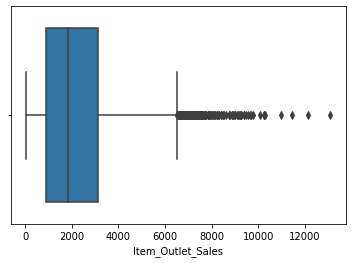

In [41]:
#viewing box plot for item outlet sales
sns.boxplot(data_train['Item_Outlet_Sales'])

In [42]:
#Placing a Cap on the data
data_train[data_train['Item_Outlet_Sales'].values<6000].count()

Item_Weight                  7958
Item_Fat_Content             7958
Item_Visibility              7958
Item_Type                    7958
Item_MRP                     7958
Outlet_Establishment_Year    7958
Outlet_Size                  7958
Outlet_Location_Type         7958
Outlet_Type                  7958
Item_Outlet_Sales            7958
dtype: int64

In [43]:
#Veiwing the data after the Cap
data_train=data_train[data_train['Item_Outlet_Sales'].values<6000]

<AxesSubplot:xlabel='Item_Outlet_Sales'>

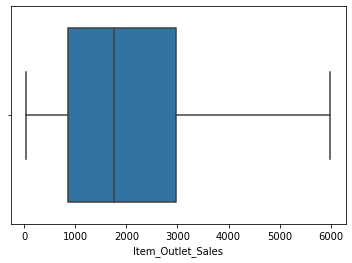

In [44]:
#Viewing the box plot after the treatment
sns.boxplot(data_train['Item_Outlet_Sales'])

In [45]:
#check variable with extreme high correlation with target variable for potential target leakage
print("correlation with target variable:\n")
data_train.corr()['Item_Outlet_Sales'].sort_values(ascending=False)

correlation with target variable:



Item_Outlet_Sales            1.000000
Item_MRP                     0.554841
Item_Weight                  0.009989
Outlet_Establishment_Year   -0.001486
Item_Visibility             -0.063880
Name: Item_Outlet_Sales, dtype: float64

In [46]:
data_corr=data_train.corr()
data_corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.005938,0.024639,-0.010047,0.009989
Item_Visibility,-0.005938,1.000000,0.002651,-0.032005,-0.063880
Item_MRP,0.024639,0.002651,1.000000,0.029837,0.554841
Outlet_Establishment_Year,-0.010047,-0.032005,0.029837,1.000000,-0.001486
Item_Outlet_Sales,0.009989,-0.063880,0.554841,-0.001486,1.000000


<AxesSubplot:>

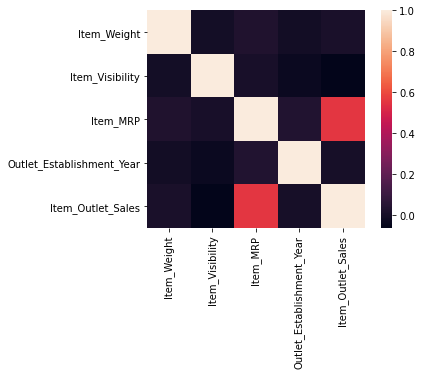

In [47]:
#correlation heatmap
import matplotlib as plt
%matplotlib inline
sns.heatmap(data =data_corr ,square = True)

In [48]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, Normalizer, RobustScaler

In [49]:
#Grouping the 
cols = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Type', 'Outlet_Location_Type','Outlet_Establishment_Year','Item_Type']

In [50]:
#Applying the label enconder
data_train[cols] = data_train[cols].apply(LabelEncoder().fit_transform)

In [51]:
data_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,4,1,0,1,3735.1380
1,5.92,2,0.019278,14,48.2692,8,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,4,1,0,1,2097.2700
3,19.20,2,0.000000,6,182.0950,3,2,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1,0,2,1,994.7052


In [52]:
# Applying Min Max Scaler
min_max_scal = MinMaxScaler()
min_max_scal.fit(data_train[['Item_Outlet_Sales']])
min_max_scal.data_max_
data_train['Item_Outlet_Sales_Max'] = min_max_scal.transform(data_train[['Item_Outlet_Sales']])
data_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Outlet_Sales_Max
0,9.30,0,0.016047,4,249.8092,4,1,0,1,3735.1380,0.621229
1,5.92,2,0.019278,14,48.2692,8,1,2,2,443.4228,0.068827
2,17.50,0,0.016760,10,141.6180,4,1,0,1,2097.2700,0.346369
3,19.20,2,0.000000,6,182.0950,3,2,2,0,732.3800,0.117318
4,8.93,0,0.000000,9,53.8614,1,0,2,1,994.7052,0.161341


In [53]:
## Applying Standard Scaler
std_scal = StandardScaler()
std_scal.fit(data_train[['Item_Outlet_Sales']])
std_scal.mean_
data_train['Item_Outlet_Sales_Std'] = std_scal.transform(data_train[['Item_Outlet_Sales']])
data_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Outlet_Sales_Max,Item_Outlet_Sales_Std
0,9.30,0,0.016047,4,249.8092,4,1,0,1,3735.1380,0.621229,1.177460
1,5.92,2,0.019278,14,48.2692,8,1,2,2,443.4228,0.068827,-1.116200
2,17.50,0,0.016760,10,141.6180,4,1,0,1,2097.2700,0.346369,0.036197
3,19.20,2,0.000000,6,182.0950,3,2,2,0,732.3800,0.117318,-0.914856
4,8.93,0,0.000000,9,53.8614,1,0,2,1,994.7052,0.161341,-0.732068


In [54]:
# Applying Normalizer Scaler
norm_scal = Normalizer()
norm_scal.fit(data_train[['Item_Outlet_Sales']])
data_train['Item_Outlet_Sales_Norm'] = norm_scal.transform(data_train[['Item_Outlet_Sales']])
data_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Outlet_Sales_Max,Item_Outlet_Sales_Std,Item_Outlet_Sales_Norm
0,9.30,0,0.016047,4,249.8092,4,1,0,1,3735.1380,0.621229,1.177460,1.0
1,5.92,2,0.019278,14,48.2692,8,1,2,2,443.4228,0.068827,-1.116200,1.0
2,17.50,0,0.016760,10,141.6180,4,1,0,1,2097.2700,0.346369,0.036197,1.0
3,19.20,2,0.000000,6,182.0950,3,2,2,0,732.3800,0.117318,-0.914856,1.0
4,8.93,0,0.000000,9,53.8614,1,0,2,1,994.7052,0.161341,-0.732068,1.0


In [55]:
# Applying Robust Scaler
rob_scal = RobustScaler()
rob_scal.fit(data_train[['Item_Outlet_Sales']])
rob_scal.scale_
data_train['Item_Outlet_Sales_Rob'] = rob_scal.transform(data_train[['Item_Outlet_Sales']])
data_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Outlet_Sales_Max,Item_Outlet_Sales_Std,Item_Outlet_Sales_Norm,Item_Outlet_Sales_Rob
0,9.300,0,0.016047,4,249.8092,4,1,0,1,3735.1380,0.621229,1.177460,1.0,0.930774
1,5.920,2,0.019278,14,48.2692,8,1,2,2,443.4228,0.068827,-1.116200,1.0,-0.624921
2,17.500,0,0.016760,10,141.6180,4,1,0,1,2097.2700,0.346369,0.036197,1.0,0.156702
3,19.200,2,0.000000,6,182.0950,3,2,2,0,732.3800,0.117318,-0.914856,1.0,-0.488357
4,8.930,0,0.000000,9,53.8614,1,0,2,1,994.7052,0.161341,-0.732068,1.0,-0.364380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1,0,2,1,2778.3834,0.460670,0.510796,1.0,0.478603
8519,8.380,2,0.046982,0,108.1570,5,2,1,1,549.2850,0.086592,-1.042436,1.0,-0.574890
8520,10.600,0,0.035186,8,85.1224,6,2,1,1,1193.1136,0.194637,-0.593817,1.0,-0.270610
8521,7.210,2,0.145221,13,103.1332,8,1,2,2,1845.5976,0.304134,-0.139168,1.0,0.037760


In [57]:
#Assiging Features and Target variables 
#Using this alternative code print('data before splitting:', data_train.shape)
#x_cols=[x for x in data_train.columns if x!='Item_Outlet_Sales']
features = data_train.drop(['Item_Outlet_Sales','Item_Outlet_Sales_Max','Item_Outlet_Sales_Std','Item_Outlet_Sales_Rob','Item_Outlet_Sales_Norm'],axis=1)
target= data_train[['Item_Outlet_Sales_Std']]
features.head()


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,0,0.016047,4,249.8092,4,1,0,1
1,5.92,2,0.019278,14,48.2692,8,1,2,2
2,17.50,0,0.016760,10,141.6180,4,1,0,1
3,19.20,2,0.000000,6,182.0950,3,2,2,0
4,8.93,0,0.000000,9,53.8614,1,0,2,1


In [58]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [61]:
X_train, X_test, y_train, y_test = train_test_split(features, target,random_state = 10)

In [64]:
#Viewing the shape of the data
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5968, 9), (1990, 9), (5968, 1), (1990, 1))

In [65]:
my_multiple_lm_simple = LinearRegression()
my_multiple_lm_simple.fit(X_train,y_train)
my_multiple_lm_simple.coef_
my_multiple_lm_simple.intercept_
my_multiple_lm_simple_preds = my_multiple_lm_simple.predict(X_test)
mean_absolute_error(my_multiple_lm_simple_preds,y_test)

0.5649110474262632

In [66]:
#Finding the Mean Square Error
mean_squared_error(my_multiple_lm_simple_preds,y_test)

0.5301009454480488

In [67]:
#Getting the R_Squared 
r2_score(y_test,my_multiple_lm_simple_preds)

0.46042229424616143

In [68]:
#Fiding the Lasso
alphas=[-5,-1,1e-8,1e-6,1e-4,1e-3,1e-2,1,5]

def test_alpha(a):
    model_ridge = Ridge(alpha=a)
    model_ridge.fit(X_train, y_train)
    pred_test_ridge = model_ridge.predict(X_test)
    new_score = r2_score(y_test, pred_test_ridge)
    new_mse = mean_squared_error(y_test, pred_test_ridge)
    print('ALPHA: {:.3f} R2 SCORE: {:.4f}% new_score, {:.1f}'.format(a,new_score, new_mse))
    
for alpha in alphas:
    test_alpha(alpha)

ALPHA: -5.000 R2 SCORE: 0.4606% new_score, 0.5
ALPHA: -1.000 R2 SCORE: 0.4605% new_score, 0.5
ALPHA: 0.000 R2 SCORE: 0.4604% new_score, 0.5
ALPHA: 0.000 R2 SCORE: 0.4604% new_score, 0.5
ALPHA: 0.000 R2 SCORE: 0.4604% new_score, 0.5
ALPHA: 0.001 R2 SCORE: 0.4604% new_score, 0.5
ALPHA: 0.010 R2 SCORE: 0.4604% new_score, 0.5
ALPHA: 1.000 R2 SCORE: 0.4604% new_score, 0.5
ALPHA: 5.000 R2 SCORE: 0.4601% new_score, 0.5


In [69]:
#Fiding the Lasso
alphas =[-5, -1, 1e-8,1e-6,1e-4, 1e-3, 1e-2, 1, 5]

def test_alpha(a):
    model_lasso = Lasso(alpha=a)
    model_lasso.fit(X_train, y_train)
    pred_test_lasso = model_lasso.predict(X_test)
    new_score = r2_score(y_test, pred_test_lasso)
    new_mse = mean_squared_error(y_test, pred_test_lasso)
    print('ALPHA: {:.3f} R2 SCORE: {:.4f}% new_score, {:.1f}'.format(a,new_score, new_mse))
for alpha in alphas:
    test_alpha(alpha)

ALPHA: -5.000 R2 SCORE: -14270.5003% new_score, 14020.8
ALPHA: -1.000 R2 SCORE: -569.7404% new_score, 560.7
ALPHA: 0.000 R2 SCORE: 0.4604% new_score, 0.5
ALPHA: 0.000 R2 SCORE: 0.4604% new_score, 0.5
ALPHA: 0.000 R2 SCORE: 0.4604% new_score, 0.5
ALPHA: 0.001 R2 SCORE: 0.4592% new_score, 0.5
ALPHA: 0.010 R2 SCORE: 0.4585% new_score, 0.5
ALPHA: 1.000 R2 SCORE: 0.3115% new_score, 0.7
ALPHA: 5.000 R2 SCORE: 0.3071% new_score, 0.7


In [71]:
#Finding the ElasticNet
alphas = [-5, -1, 1e-8,1e-6,1e-4, 1e-3, 1e-2, 1, 5]

def test_alpha(a):
    model_elastic = ElasticNet(alpha=a)
    model_elastic.fit(X_train, y_train)
    pred_test_elastic = model_elastic.predict(X_test)
    new_score = r2_score(y_test, pred_test_elastic)
    new_mse = mean_squared_error(y_test, pred_test_elastic)
    print('ALPHA: {:.3f} R2 SCORE: {:.4f}% new_score, {:.1f}'.format(a,new_score, new_mse))
    
for alpha in alphas:
    test_alpha(alpha)

ALPHA: -5.000 R2 SCORE: -17.1553% new_score, 17.8
ALPHA: -1.000 R2 SCORE: -0.0005% new_score, 1.0
ALPHA: 0.000 R2 SCORE: 0.4604% new_score, 0.5
ALPHA: 0.000 R2 SCORE: 0.4604% new_score, 0.5
ALPHA: 0.000 R2 SCORE: 0.4604% new_score, 0.5
ALPHA: 0.001 R2 SCORE: 0.4598% new_score, 0.5
ALPHA: 0.010 R2 SCORE: 0.4590% new_score, 0.5
ALPHA: 1.000 R2 SCORE: 0.3114% new_score, 0.7
ALPHA: 5.000 R2 SCORE: 0.3110% new_score, 0.7


In [ ]:
#Usng Manual Calculation
my_ols_model = smf.ols(formula='Item_Outlet_Sales_Std ~ Item_Weight +Item_Fat_Content + Item_Visibility + Item_Type + Item_MRP +Outlet_Establishment_Year + Outlet_Size + Outlet_Location_Type +Outlet_Type', data =data_train).fit()
my_ols_model.summary()

In [72]:
#Polynomical Linear Regression

from sklearn.preprocessing import PolynomialFeatures
features_poly=PolynomialFeatures(degree=2)
train_Poly=features_poly.fit_transform(features)
train_Poly

array([[ 1.  ,  9.3 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [ 1.  ,  5.92,  2.  , ...,  4.  ,  4.  ,  4.  ],
       [ 1.  , 17.5 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       ...,
       [ 1.  , 10.6 ,  0.  , ...,  1.  ,  1.  ,  1.  ],
       [ 1.  ,  7.21,  2.  , ...,  4.  ,  4.  ,  4.  ],
       [ 1.  , 14.8 ,  0.  , ...,  0.  ,  0.  ,  1.  ]])

In [73]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(train_Poly, target,random_state = 6)

In [74]:
#Fitting the Regression
my_model = LinearRegression()
my_model.fit(X_train, y_train)
preds = my_model.predict(X_test)
print('MAE : ', mean_absolute_error(y_test, preds))
print('MSE : ', mean_squared_error(y_test, preds))
print('R2 : ', r2_score(y_test, preds))

MAE :  0.5063635221381807
MSE :  0.44709466714577395
R2 :  0.5517740971291669


In [75]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5968, 55)
(1990, 55)
(5968, 1)
(1990, 1)


In [76]:
from sklearn.decomposition import PCA

In [77]:
#using the PCA
pca=PCA(n_components=30)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [78]:
#Finding the explained variance
pca.explained_variance_ratio_

array([9.96552934e-01, 1.51322829e-03, 1.20511587e-03, 5.27418264e-04,
       7.62093643e-05, 6.37594963e-05, 2.42569520e-05, 1.89479857e-05,
       1.00901022e-05, 4.15432583e-06, 1.35881615e-06, 9.12735851e-07,
       3.92834018e-07, 3.38921562e-07, 1.78563094e-07, 1.49042067e-07,
       1.33364324e-07, 1.25299539e-07, 5.98842032e-08, 5.24073170e-08,
       4.95592705e-08, 4.19868843e-08, 2.33278668e-08, 1.95851504e-08,
       1.71995105e-08, 1.63838468e-08, 3.43722850e-09, 3.38018148e-09,
       1.74664954e-09, 1.57487884e-09])